In [1]:
#Factors affecting on MOE
#Effect of SD on MOE
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.stats import norm, zscore

In [2]:
z=1.96
n=64
sd=10

In [3]:
moe=[]
std_dev=range(21)

In [4]:
for i in std_dev:
    moe.append(z*i/sqrt(n))
moe

[0.0,
 0.245,
 0.49,
 0.735,
 0.98,
 1.225,
 1.47,
 1.7149999999999999,
 1.96,
 2.205,
 2.45,
 2.695,
 2.94,
 3.185,
 3.4299999999999997,
 3.675,
 3.92,
 4.165,
 4.41,
 4.655,
 4.9]

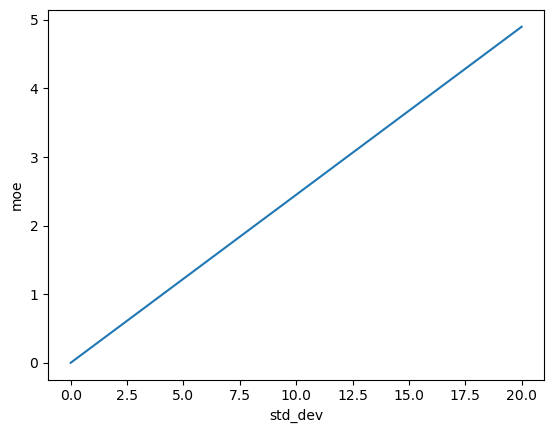

In [5]:
plt.plot(std_dev,moe)
plt.xlabel('std_dev')
plt.ylabel('moe')
plt.show()

In [6]:
#Effect of sample size on MOE
moe=[]
sample_size=range(10,1000,10)

In [7]:
for i in sample_size:
    moe.append(z*sd/sqrt(i))

Text(0, 0.5, 'moe')

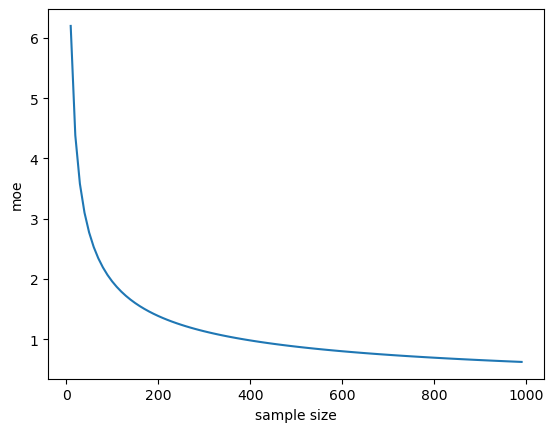

In [8]:
plt.plot(sample_size, moe)
plt.xlabel('sample size')
plt.ylabel('moe')
plt.show()

In [9]:
#Effect of CI on MOE
ci=[i for i in np.arange(75,100,0.1)]
z=[-norm.ppf((1-i/100)/2) for i in ci]

In [10]:
moe=[]
for i in z:
    moe.append(i*sd/sqrt(n))

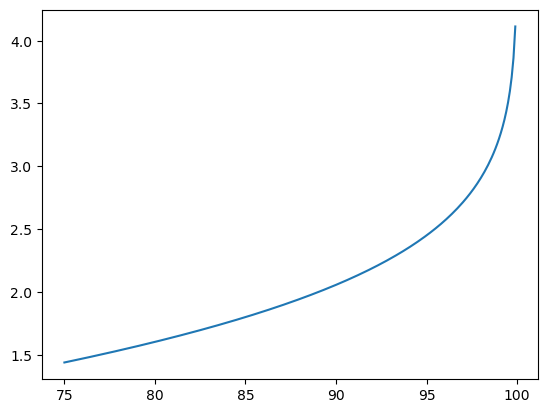

In [11]:
plt.plot(ci, moe)
plt.show()

In [12]:
#student's t distribution
from scipy.stats import t

In [13]:
x=np.arange(-3.8, 4, 1/20)

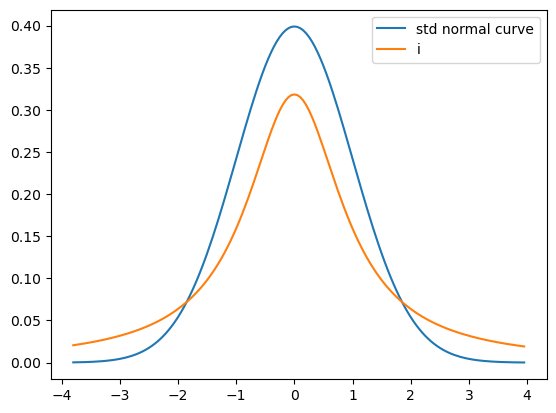

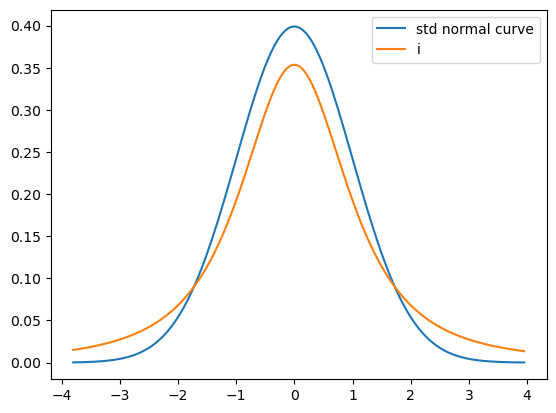

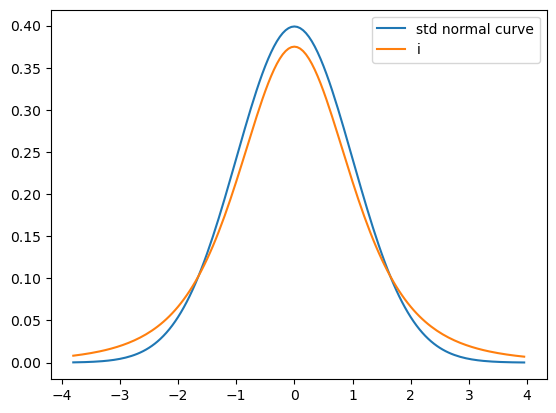

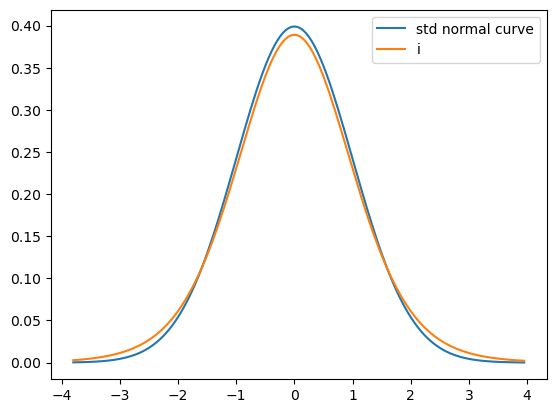

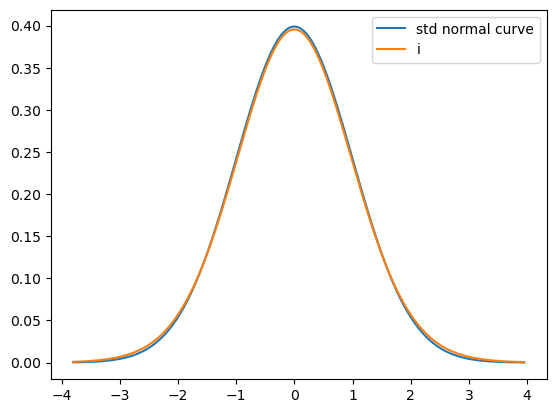

In [23]:
x=np.arange(-3.8,4,1/20)
for i in [1,2,4,10,29]:
    plt.plot(x,norm.pdf(x),label='std normal curve')
    plt.plot(x,t.pdf(x,i),label='i')
    plt.legend(loc='upper right')
    plt.show()
    

In [15]:
# Hypothesis Tesing(two tailed test)
def two_tailed(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z=abs(norm.ppf(alpha/2))
    hypo_z=((sample_mean-pop_mean)/(std_dev/sqrt(sample_size)))
    print("actual z=", actual_z)
    print("hypo z", hypo_z)
    if actual_z>=hypo_z or hypo_z<= -(actual_z):
        return True
    else:
        return False
        
    
alpha=0.05
sample_mean=585
pop_mean=558
sd=139
sample_size=100

print('H0: mu=', pop_mean)
print('h1: mu!=', pop_mean)
print('alpha=',alpha)
reject = two_tailed(sample_mean, pop_mean, sd, sample_size, alpha)
if reject:
    print("Reject H0")
else:
    print("Failed to reject H0")

H0: mu= 558
h1: mu!= 558
alpha= 0.05
actual z= 1.9599639845400545
hypo z 1.9424460431654675
Reject H0


In [16]:
# Hypothesis Tesing(left tailed test)
def two_tailed(sample_mean, pop_mean, std_dev, sample_size, alpha):
    actual_z=abs(norm.ppf(alpha))
    hypo_z=((sample_mean-pop_mean)/(std_dev/sqrt(sample_size)))
    print("actual z=", actual_z)
    print("hypo z", hypo_z)
    if hypo_z<= -(actual_z) :
        return True
    else:
        return False
        
    
alpha=0.05
sample_mean=585
pop_mean=558
sd=139
sample_size=100

print('H0: mu>=', pop_mean)
print('h1: mu<', pop_mean)
print('alpha=',alpha)
reject = two_tailed(sample_mean, pop_mean, sd, sample_size, alpha)
if reject:
    print("Reject null hypothesis(H)")
else:
    print("Failed to reject null hypothesis(H0)")

H0: mu>= 558
h1: mu< 558
alpha= 0.05
actual z= 1.6448536269514729
hypo z 1.9424460431654675
Failed to reject H0


Proportion of CIs covering Pop mean 0.97


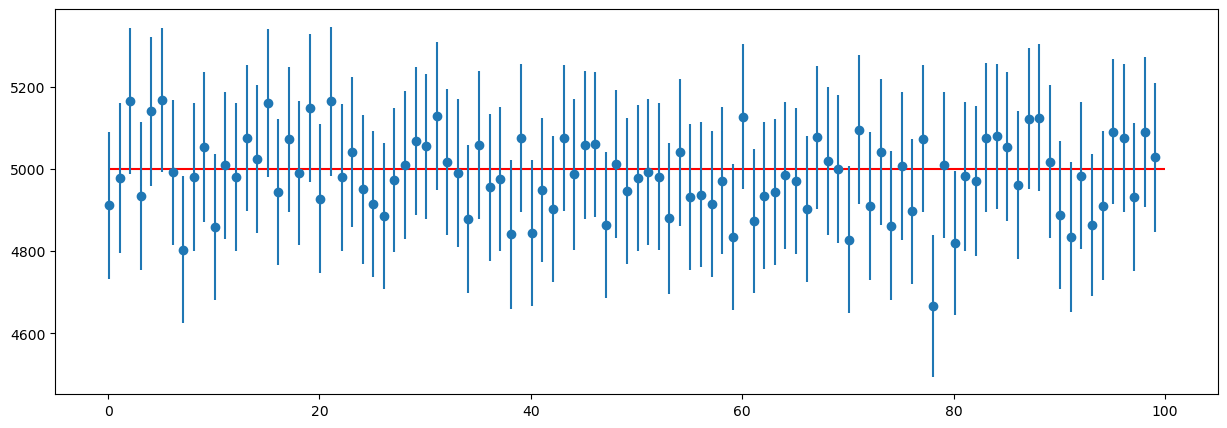

In [24]:
#Confidence Interval
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import norm
import random

population = np.arange(1, 10**4)      #random population
pop_mean = np.mean(population)

def sampling(sample_size, no_of_samples):
    sample_means = []
    intervals = []
    count = 0
    for i in range(no_of_samples):
        sample = random.sample(list(population), sample_size)
        sample_means.append(np.mean(sample))
        ci = norm.interval(0.95, np.mean(sample), 
                            np.std(sample, ddof =1)/sqrt(sample_size))
        intervals.append(ci)
        if pop_mean >= ci[0] and pop_mean <= ci[1]:
            count = count + 1
            
    print('Proportion of CIs covering Pop mean', count/no_of_samples)
    plt.figure(figsize=(15,5))
    plt.hlines(y = pop_mean, xmin = 0, xmax = 100, color ='r')
    plt.errorbar(np.arange(0.1, 100, 1), sample_means, fmt = 'o', yerr = [(upp - low)/2 for low, upp in intervals])
    plt.show()
    

sampling(1000, 100)